In [1]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import time

In [2]:
# Emulation settings
GRID_SIZE = (16, 24) # Y, X

# Points
POINT_A = (15, 16) # Y, X
POINT_B = (15, 23) # Y, X

# Create grid
grid = np.zeros([GRID_SIZE[0], GRID_SIZE[1]])

# Reset grid
def reset_grid(grid):
    grid = np.zeros([GRID_SIZE[0], GRID_SIZE[1]])
    return grid

# Plot grid in photos app
def show_grid(grid):
    # Convert grid to image
    grid_view = Image.fromarray(grid)
    
    # Display image
    grid_view.show()

# Draw line
def draw_line(grid, point_a, point_b):
    for y_cur in range(0, GRID_SIZE[0]):
        for x_cur in range(0, GRID_SIZE[1]):
            if (((y_cur, x_cur) == point_a) or ((y_cur, x_cur) == point_b)):
                grid[y_cur, x_cur] = 5
            else:
                # Store distances
                dist_cur = GRID_SIZE[0]
                dist_up_left = GRID_SIZE[0]
                dist_down_right = GRID_SIZE[0]
                
                # Calculate distances
                dist_cur = cross_product_length(point_a, (y_cur, x_cur), point_b)
                    
                # Determine whether to draw
                # Pixel is perfectly on the line
                exact = 0 #(dist_cur == 0)
                
                # Re-use the up-down checks for left-right
                sign_mismatch_any = 0
                closest_any = 0
                if (steep(point_a, point_b)):
                    dist_up_left = cross_product_length(point_a, (y_cur, x_cur - 1), point_b)
                    dist_down_right = cross_product_length(point_a, (y_cur, x_cur + 1), point_b)
                else:
                    dist_up_left = cross_product_length(point_a, (y_cur - 1, x_cur), point_b)
                    dist_down_right = cross_product_length(point_a, (y_cur + 1, x_cur), point_b)
                    
                # Determine if this point is the closest of the three
                sign_mismatch_any = sign_mismatch(dist_up_left, dist_cur, dist_down_right)
                # Need one < and one <= to prevent double draws on perfect midpoints
                #  Two <= will double draw, two < will not draw
                closest_any = (np.abs(dist_cur) < np.abs(dist_up_left)) and (np.abs(dist_cur) <= np.abs(dist_down_right))
                
                # exact OR best in column / row
                final = exact or (sign_mismatch_any and closest_any) 
                #(sign_mismatch_y and closest_y) or (sign_mismatch_x and closest_x)
                
                # Draw if needed
                if final and (between(point_a, (y_cur, x_cur), point_b)):
                    grid[y_cur, x_cur] = 4

# The signed length of the cross product
# https://en.wikipedia.org/wiki/Cross_product#Computational_geometry
def cross_product_length(p1, p2, p3):
    return (p1[1] - p3[1]) * (p3[0] - p2[0]) - (p1[0] - p3[0]) * (p3[1] - p2[1])

# Determines if p2 is inside the X and Y bounds set by p1 and p3
def between(p1, p2, p3):
    return (((p1[0] <= p2[0]) and (p2[0] <=p3[0])) or ((p1[0] >= p2[0]) and (p2[0] >= p3[0]))) \
       and (((p1[1] <= p2[1]) and (p2[1] <=p3[1])) or ((p1[1] >= p2[1]) and (p2[1] >= p3[1])))

# Converts 0 to 1, passes anything else. Two's comp has a positive zero
def sign_zero_pos(sign):
    if (sign == 0): return 1
    return sign

# Determines if there is a mix of positive and negative in the input integers
def sign_mismatch(int1, int2, int3):
    return (sign_zero_pos(np.sign(int1)) != sign_zero_pos(np.sign(int2))) \
        or (sign_zero_pos(np.sign(int1)) != sign_zero_pos(np.sign(int3))) \
        or (sign_zero_pos(np.sign(int2)) != sign_zero_pos(np.sign(int3)))

# Determines if the slope is greater than 1
def steep(point_a, point_b):
    return (np.abs(point_a[0] - point_b[0])) > (np.abs(point_a[1] - point_b[1]))

# Do a given number of random plots
def do_random_draws(runs):
    # Close old figures
    plt.close("all")
    
    # Plot random lines
    for i in range(0, runs):
        # Choose random points
        rand_a = (np.random.randint(0, GRID_SIZE[0]), np.random.randint(0, GRID_SIZE[1]))
        rand_b = (np.random.randint(0, GRID_SIZE[0]), np.random.randint(0, GRID_SIZE[1]))
        
        # Plot the line
        rand_grid = np.zeros([GRID_SIZE[0], GRID_SIZE[1]])
        draw_line(rand_grid, rand_a, rand_b)
        plt.figure()
        plt.imshow(rand_grid)

# Do known edge cases
def do_edge_case_draws():
    # Close old figures
    plt.close("all")
    
    # Create local grid
    edge_grid = np.zeros([GRID_SIZE[0], GRID_SIZE[1]])
    
    # Points
    draw_line(edge_grid, (0, 0), (0, 0))
    plt.figure()
    plt.imshow(edge_grid)
    
    edge_grid = reset_grid(edge_grid)
    draw_line(edge_grid, (int(GRID_SIZE[1] * 0.3), int(GRID_SIZE[1] * 0.6)), \
                         (int(GRID_SIZE[1] * 0.3), int(GRID_SIZE[1] * 0.6)))
    plt.figure()
    plt.imshow(edge_grid)
    
    # Edges
    edge_grid = reset_grid(edge_grid)
    draw_line(edge_grid, (0, 0), (GRID_SIZE[0] - 1, 0))
    plt.figure()
    plt.imshow(edge_grid)
    
    edge_grid = reset_grid(edge_grid)
    draw_line(edge_grid, (0, GRID_SIZE[1] - 1), (0, 0))
    plt.figure()
    plt.imshow(edge_grid)
    
    edge_grid = reset_grid(edge_grid)
    draw_line(edge_grid, (0, GRID_SIZE[1] - 1), (GRID_SIZE[0] - 1, GRID_SIZE[1] - 1))
    plt.figure()
    plt.imshow(edge_grid)
    
    edge_grid = reset_grid(edge_grid)
    draw_line(edge_grid, (GRID_SIZE[0] - 1, 0), (GRID_SIZE[0] - 1, GRID_SIZE[1] - 1))
    plt.figure()
    plt.imshow(edge_grid)
    
    # Slopes
    edge_grid = reset_grid(edge_grid)
    draw_line(edge_grid, (int(GRID_SIZE[0] * 0.2), int(GRID_SIZE[1] * 0.5)), \
                         (int(GRID_SIZE[0] * 0.8), int(GRID_SIZE[1] * 0.5)))
    plt.figure()
    plt.imshow(edge_grid)
    
    edge_grid = reset_grid(edge_grid)
    draw_line(edge_grid, (int(GRID_SIZE[0] * 0.5), int(GRID_SIZE[1] * 0.2)), \
                         (int(GRID_SIZE[0] * 0.5), int(GRID_SIZE[1] * 0.8)))
    plt.figure()
    plt.imshow(edge_grid)
    
    edge_grid = reset_grid(edge_grid)
    draw_line(edge_grid, (int(GRID_SIZE[0] * 0.2), int(GRID_SIZE[1] * 0.2)), \
                         (int(GRID_SIZE[0] * 0.8), int(GRID_SIZE[1] * 0.5)))
    plt.figure()
    plt.imshow(edge_grid)
    
    edge_grid = reset_grid(edge_grid)
    draw_line(edge_grid, (int(GRID_SIZE[0] * 0.8), int(GRID_SIZE[1] * 0.2)), \
                         (int(GRID_SIZE[0] * 0.2), int(GRID_SIZE[1] * 0.8)))
    plt.figure()
    plt.imshow(edge_grid)

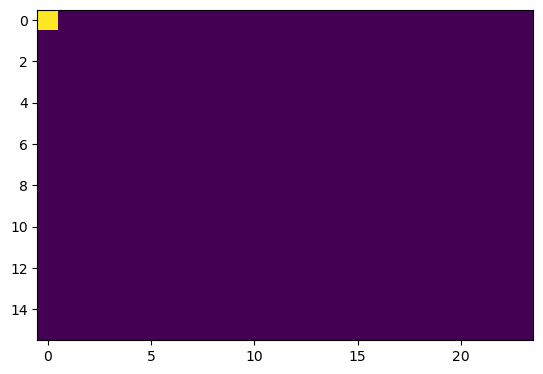

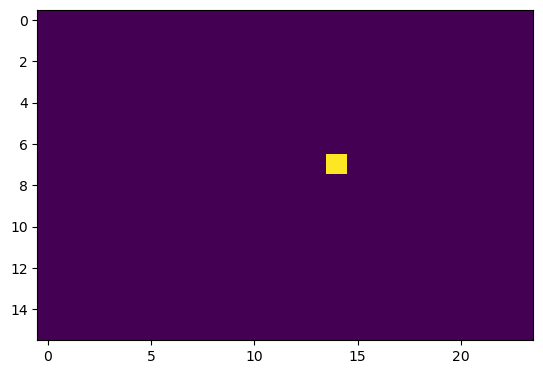

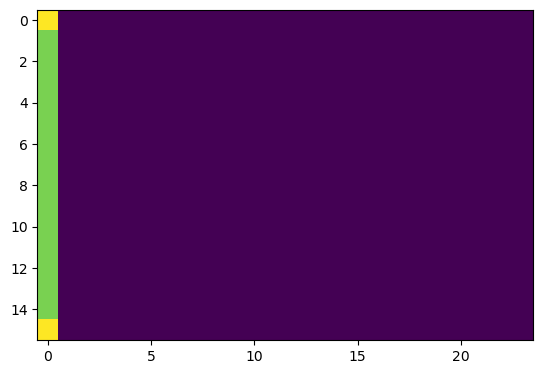

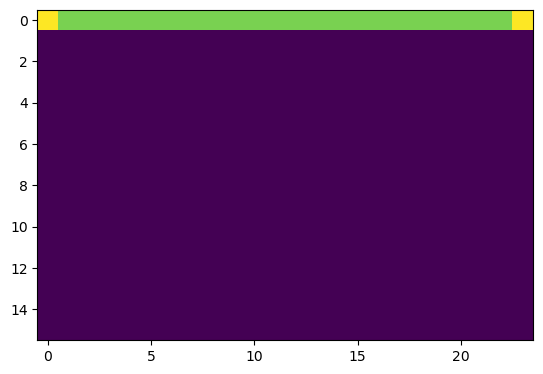

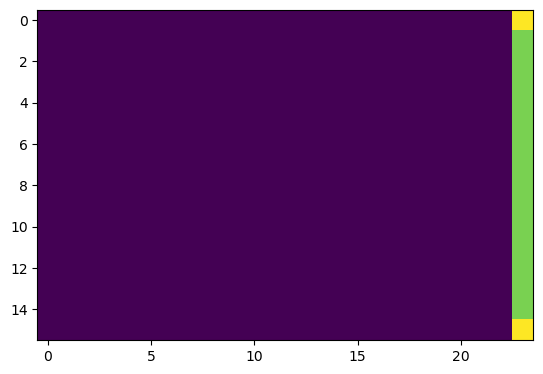

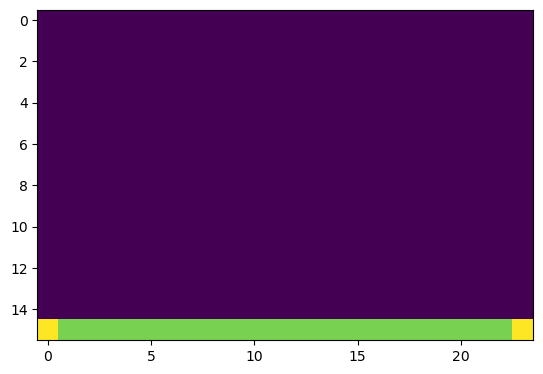

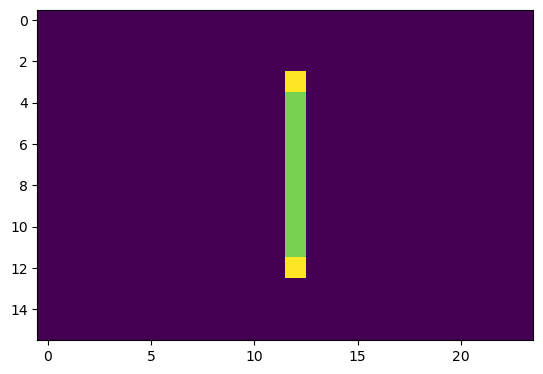

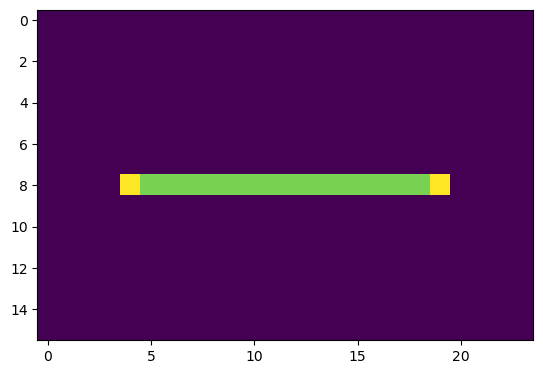

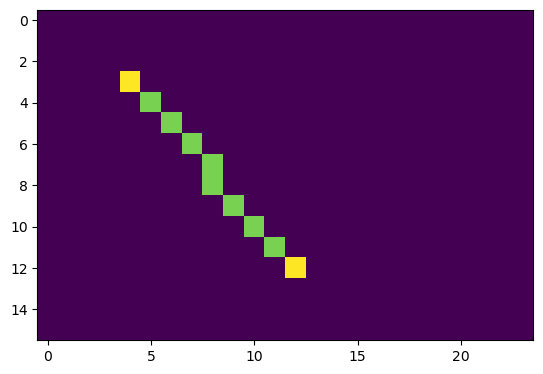

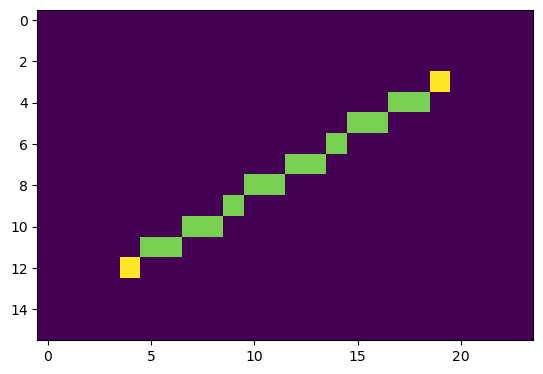

In [3]:
do_edge_case_draws()

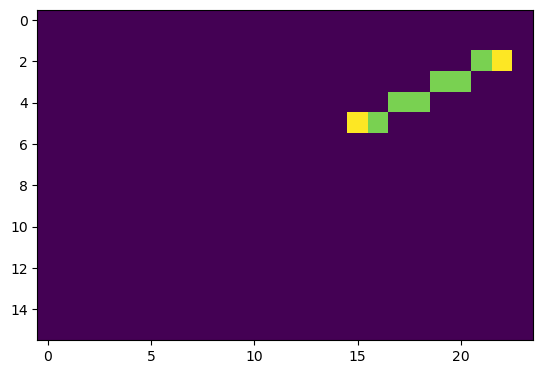

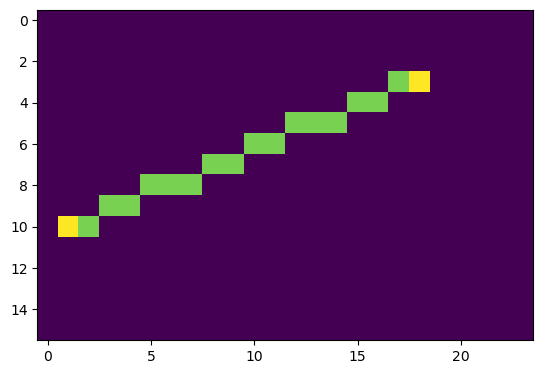

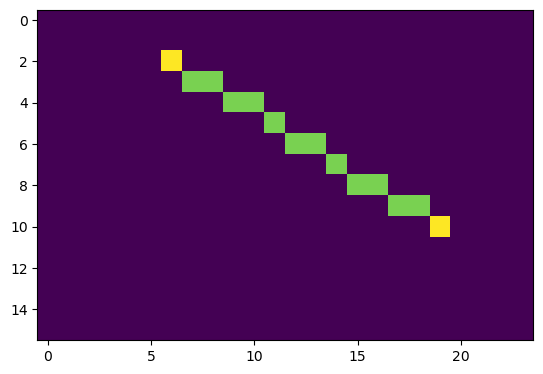

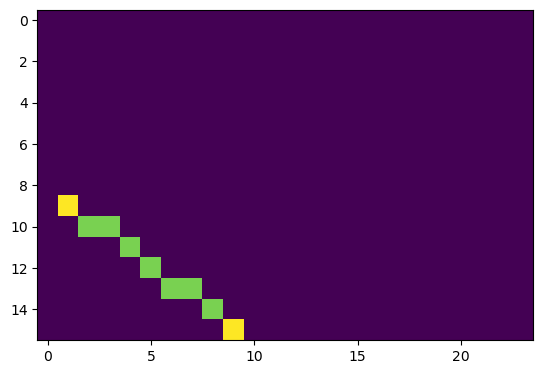

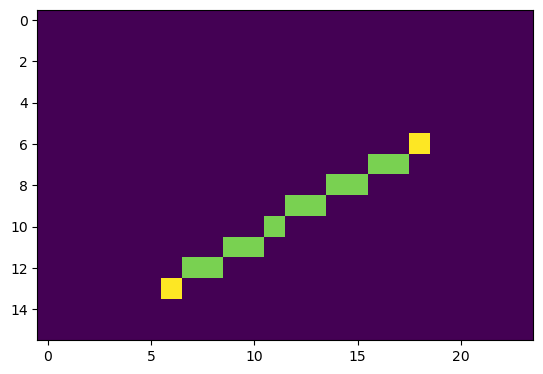

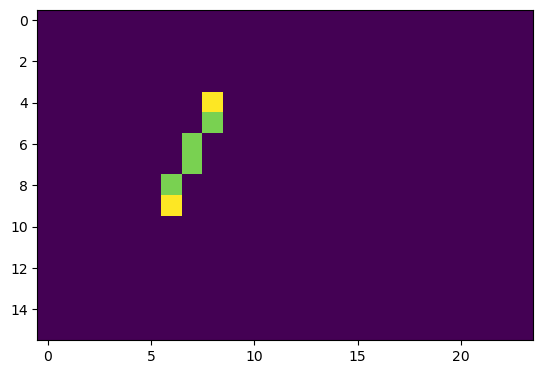

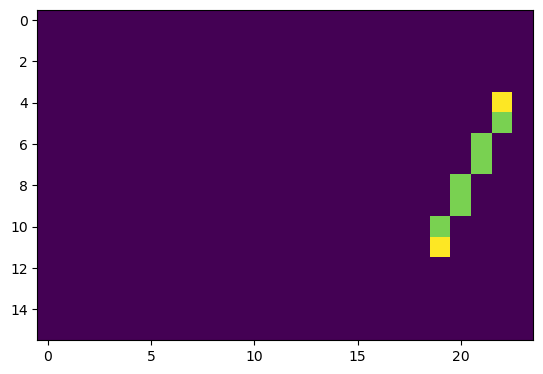

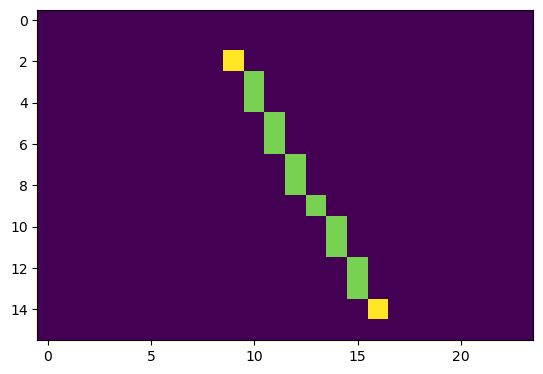

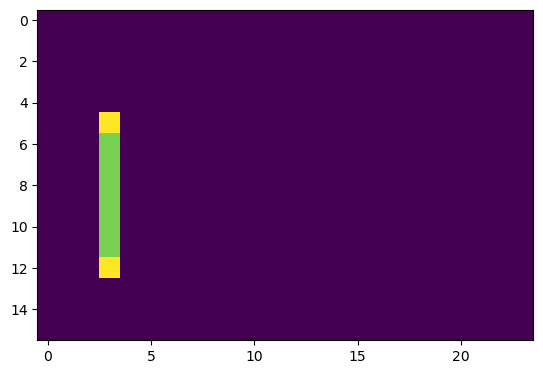

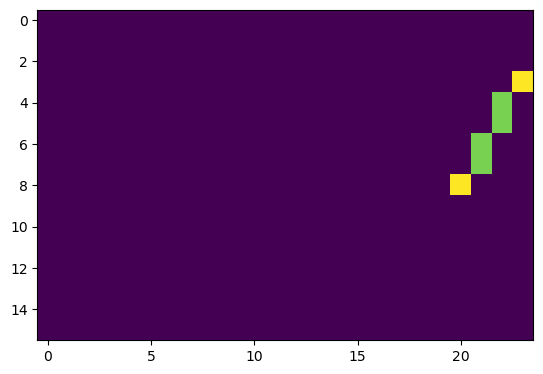

In [7]:
do_random_draws(10)

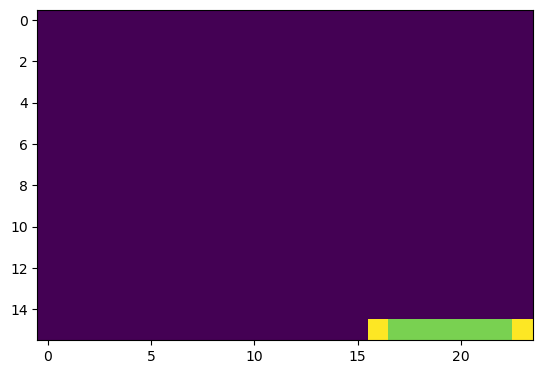

In [5]:
# User-targeted line
reset_grid(grid)
draw_line(grid, POINT_A, POINT_B)
plt.imshow(grid)